# Pandas Examples

In [1]:
#Input data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) Accessing DataFrames and Series

In [57]:
# Input table (12 samples x 4 attributes)
X = np.array([[5.1, 3.5, 1, 0.2],
           [4.3, 3. , 1, 0.1],
           [5. , np.nan, 1, 0.4],
           [5.1, 3.4, 2, 0.2],
           [7.0, 3.2, 1, 0.2],
           [6.9, 3.1, 3, 1.5],
           [6.7, 3.1, 1, np.nan],
           [6. , 2.9, 2, 1.5],
           [6.1, 3. , 2, 1.4],
           [6.5, 3. , 3, 2.2],
           [7.7, 3.8, 3, 2.2],
           [7.4, 2.8, 1, 1.9],
           [6.8, 3.2, 1, 2.3]])
# Column names
columns = ['height','width','intensity','weight']

# Class label of each sample
labels = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

**a) Create a DataFrame from a Numpy array (X)**
- Setup column names and the class label
- Add a new composite feature, 'area' = 'width' * 'height'
- Fix missing values with forward fill method

In [58]:
# Create the DataFrame object using X as data and
# columns as columns
df = pd.DataFrame(X, columns=columns)

# Fill np.nan entries with the ffill method.
# It uses last valid method. It is applied to each column.
# Since it returns a copy, we need to update the value of our df
df = df.fillna(method='ffill')

# Compute the area and put it into our df
area = df['width']*df['height']
df['area'] = area
# Add label column
df['labels'] = labels
df

,height,width,intensity,weight,area,labels
0,5.1,3.5,1.0,0.2,17.85,0
1,4.3,3.0,1.0,0.1,12.90,0
2,5.0,3.0,1.0,0.4,15.00,0
3,5.1,3.4,2.0,0.2,17.34,0
4,7.0,3.2,1.0,0.2,22.40,0
5,6.9,3.1,3.0,1.5,21.39,1
6,6.7,3.1,1.0,1.5,20.77,1
7,6.0,2.9,2.0,1.5,17.40,1
8,6.1,3.0,2.0,1.4,18.30,1
9,6.5,3.0,3.0,2.2,19.50,2


**b) Compute the average area of samples with intensity greater than 1:**

In [59]:
# Create a mask in which we select the rows containing values of intensity greater than 1
# mask is a Series object
mask = df['intensity']>1

# Once we have those values, we can call the mean() method.
# It returns the mean of each column
mean_values = df[mask].mean()

mask, mean_values

(0     False
 1     False
 2     False
 3      True
 4     False
 5      True
 6     False
 7      True
 8      True
 9      True
 10     True
 11    False
 12    False
 Name: intensity, dtype: bool,
 height        6.383333
 width         3.200000
 intensity     2.500000
 weight        1.500000
 area         20.531667
 labels        1.166667
 dtype: float64)

**c) Compute the following probability:**

$$P(label=2 \ | \ height<7) = \frac{\#(lab = 2 \land height < 7)}{\#(height<7)}$$   

In [60]:
# Compute the mask to obtain samples in which height is less than 7.
# The sum of these values is the number of samples with height less than 7, thus the denominator
mask = df['height'] < 7
denominator = mask.sum()

# Given the previous mask, we compute another mask in which we select samples with label = 2
# The sum will be our numerator
numerator_mask = df[mask]['labels'] == 2
numerator = numerator_mask.sum()

print("The probability to obtain a label equal to 2 given that the height is less than 7 is %.2f" % (numerator/denominator))

The probability to obtain a label equal to 2 given that the height is less than 7 is 0.20


**d) Compute the following probability. Use the Naive Bayes technique.**
$$P(label=l \ | \ intensity=2 \land height<6.5) = \frac{P(label = l\land intensity=2\land height<6.5)}{P(intensity=2\land height<6.5)}$$

In [61]:
# Return unique values, the set of labels in df
labels = df['labels'].unique() 

# This returns a series containing values that were selected before to have intensity = 2
# Thus we will not have anymore all the rows, but only true ones.
musk = df[df["intensity"] == 2]["height"] < 6.5

# Since the name of the index is the same, we can use the index of musk to obtain desired values
df1 = df.loc[musk.index]

denominator = musk.sum()

for label in labels:
    # We mask the dataframe to obtain rows in which we have the label that we want. 
    # Then we sum them and obtain the number of values matching that label
    num_val = (df1['labels'] == label).sum()
    print("The probability to obtain a label equal to %d given that the height is less than 6.5 and intensity = 2 is %.2f" % (label,(num_val/denominator)))

The probability to obtain a label equal to 0 given that the height is less than 6.5 and intensity = 2 is 0.33
The probability to obtain a label equal to 1 given that the height is less than 6.5 and intensity = 2 is 0.67
The probability to obtain a label equal to 2 given that the height is less than 6.5 and intensity = 2 is 0.00


**e) Normalize columns with Sklearn standard scaler, fit a random forest**

In [67]:
# Input table (12 samples x 4 attributes)
X = np.array([[5.1, 3.5, 1, 0.2],
           [4.3, 3. , 1, 0.1],
           [5. , np.nan, 1, 0.4],
           [5.1, 3.4, 2, 0.2],
           [7.0, 3.2, 1, 0.2],
           [6.9, 3.1, 3, 1.5],
           [6.7, 3.1, 1, np.nan],
           [6. , 2.9, 2, 1.5],
           [6.1, 3. , 2, 1.4],
           [6.5, 3. , 3, 2.2],
           [7.7, 3.8, 3, 2.2],
           [7.4, 2.8, 1, 1.9],
           [6.8, 3.2, 1, 2.3]])
# Column names
columns = ['height','width','intensity','weight']

# Class label of each sample
labels = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Create the DataFrame object using X as data and
# columns as columns
df = pd.DataFrame(X, columns=columns)

# Fill np.nan entries with the ffill method.
# It uses last valid method. It is applied to each column.
# Since it returns a copy, we need to update the value of our df
df = df.fillna(method='ffill')

# Compute the area and put it into our df
area = df['width']*df['height']
df['area'] = area

# Scale data and put them in our df
df_norm = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

# Add label column
df_norm['labels'] = labels

# We pass to the classifiers all rows (first ':') and all columns but 'labels'
# The latter will be used as label -> target y
clf = RandomForestClassifier(n_estimators=10).fit(X=df_norm.loc[:,:'labels'], y=df_norm['labels'])

clf

RandomForestClassifier(n_estimators=10)

## 2) Working with Pandas and spatial data
**a) Load dataframe with Points Of Interest (POIs)**

In [83]:
# This dictionary maps attributes in the table with correct data types
d_types = {'@type':str, '@lat':float, '@lon':float, 'amenity':str, 'name':str, 
           'shop':str, 'public_transport':str, 'highway':str}
# Read "./pois_all_info"
all_pois_df = pd.read_csv("pois_all_info.csv", sep='\t', index_col='@id', dtype=d_types)

In [84]:
print(all_pois_df.info())
all_pois_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77884 entries, 42432939 to 600931233
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   @type             77884 non-null  object 
 1   @lat              75789 non-null  float64
 2   @lon              75789 non-null  float64
 3   amenity           32271 non-null  object 
 4   name              40790 non-null  object 
 5   shop              12850 non-null  object 
 6   public_transport  10390 non-null  object 
 7   highway           9445 non-null   object 
dtypes: float64(2), object(6)
memory usage: 5.3+ MB
None


,@type,@lat,@lon,amenity,name,shop,public_transport,highway
@id,,,,,,,,
42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN
42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN
42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN
42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN
42811266,node,40.704806,-73.772734,NaN,NaN,NaN,stop_position,NaN


**b) Plot POIS on New-York map**

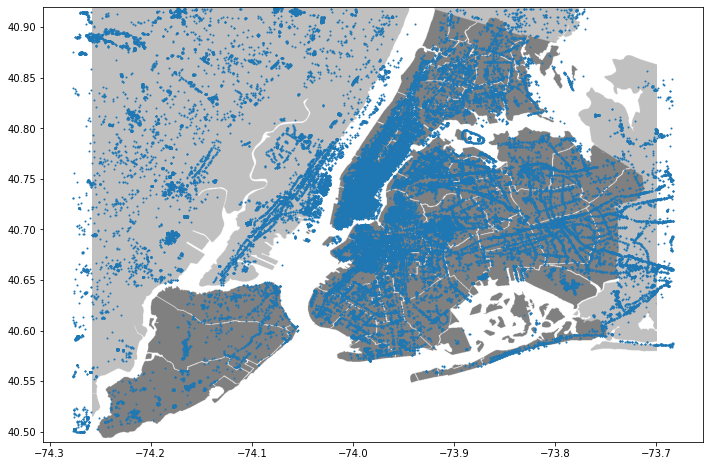

In [122]:
def plot_map(pois_df: pd.DataFrame, col:str='tab:blue'):
    fig, ax = plt.subplots(figsize=(12,8))
    nyc_img = plt.imread('./New_York_City_Map.PNG')
    ax.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
    ax.scatter(x=pois_df['@lon'], y=pois_df['@lat'], s=1, c=col)
    plt.show()

plot_map(all_pois_df)

**c) Filter only POIS in NY municipality**
- Plot the result on a map

In [114]:
# Read "./data/ny_municipality_pois_id.csv"
ny_pois_ids = pd.read_csv("ny_municipality_pois_id.csv", header=None)[0]

In [115]:
ny_pois_ids.values
all_pois_df.loc[ny_pois_ids.values]

,@type,@lat,@lon,amenity,name,shop,public_transport,highway
@id,,,,,,,,
42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN
42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN
42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN
42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN
42811266,node,40.704806,-73.772734,NaN,NaN,NaN,stop_position,NaN
...,...,...,...,...,...,...,...,...
2553096114,node,40.736006,-73.713202,NaN,NaN,NaN,NaN,NaN
2553096138,node,40.736020,-73.713063,NaN,NaN,NaN,NaN,NaN
2553096143,node,40.736024,-73.713047,NaN,NaN,NaN,NaN,NaN


In [116]:
pois_df = all_pois_df.loc[ny_pois_ids.values]

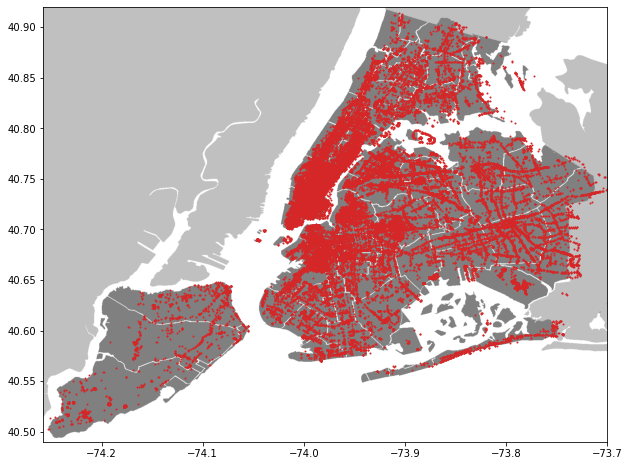

In [124]:
plot_map(pois_df, 'tab:red')

**d) Count top-frequent public_transport types**

In [140]:
top_freq = [(pois_df['public_transport'].value_counts().index[i], pois_df['public_transport'].value_counts().values[i]) for i in range(len(pois_df['public_transport'].value_counts()))]
print(*top_freq[0])

platform 5821


**e) Plot POIs with the two most frequent public transport types**

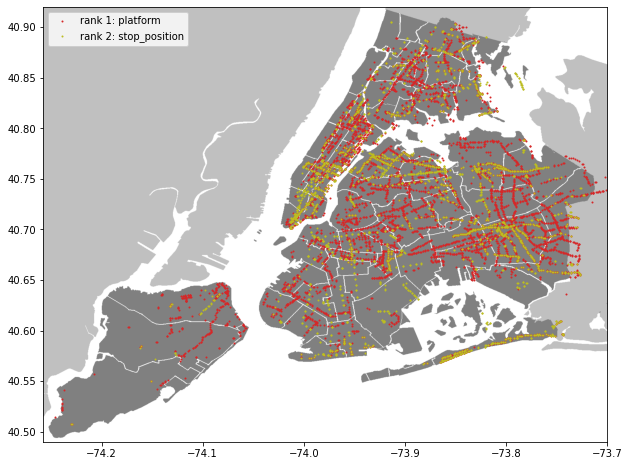

In [160]:
## Plot POIs on the map
fig, ax = plt.subplots(figsize=(12,8))
nyc_img = plt.imread('./New_York_City_Map.PNG')
ax.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])


## TODO:
top_2 = [top_freq[i][0] for i in range(len(top_freq[:2]))]
colors = ["tab:red", "tab:olive"]

for top,col in enumerate(colors):
    mask = pois_df['public_transport'] == top_2[top]
    ax.scatter(pois_df[mask]['@lon'], pois_df[mask]['@lat'], s=1, c=col, label=f"rank {top+1}: {top_2[top]}")

plt.legend()
plt.show()